TODO:


*   Rolling Mean



In [177]:
#Library Imports
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import datetime
import time
import numpy as np

font = {'family' : 'helvetica',
        'weight' : 'normal',
        'size'   : 11}

plt.rc('font', **font)

In [3]:
#CSV Import
dex_df = pd.read_csv('https://raw.githubusercontent.com/keroshanpillay/Stablecoin-Data-Project/master/Final_Data/dex_data.csv', low_memory=False)
stable_df = pd.read_csv('https://raw.githubusercontent.com/keroshanpillay/Stablecoin-Data-Project/master/Final_Data/stable_onchain_data_2021_July2022.csv', low_memory = False)
lend_df = pd.read_csv('https://raw.githubusercontent.com/keroshanpillay/Stablecoin-Data-Project/master/Final_Data/lend_df.csv', low_memory = False)
stable_df = stable_df.sort_values(by=["date"])

In [206]:
dex_df[(dex_df['protocol']=='Uniswap')&
      (dex_df['pool_name']=='USDC/WETH')]

,date,protocol,chain,protocol_version,pool_name,token_1,token_1_balance,token_1_value_USD,token_2,token_2_balance,token_2_value_USD,token_3,token_3_balance,token_4,token_4_balance,daily_revenue,TVL,ideal
784,2021-01-01,Uniswap,Ethereum,V2,USDC/WETH,USDC,6.135226e+07,NaN,WETH,33312.498846,NaN,NaN,NaN,NaN,NaN,NaN,1.227144e+08,NaN
785,2021-01-01,Uniswap,Ethereum,V2,USDC/WETH,USDC,6.135226e+07,NaN,WETH,33312.498846,NaN,NaN,NaN,NaN,NaN,NaN,1.227144e+08,NaN
787,2021-01-01,Uniswap,Ethereum,V2,USDC/WETH,USDC,6.135226e+07,NaN,WETH,33312.498846,NaN,NaN,NaN,NaN,NaN,NaN,1.227144e+08,NaN
791,2021-01-01,Uniswap,Ethereum,V2,USDC/WETH,USDC,6.135226e+07,NaN,WETH,33312.498846,NaN,NaN,NaN,NaN,NaN,NaN,1.227144e+08,NaN
796,2021-01-01,Uniswap,Ethereum,V2,USDC/WETH,USDC,6.135226e+07,NaN,WETH,33312.498846,NaN,NaN,NaN,NaN,NaN,NaN,1.227144e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128940,2022-07-30,Uniswap,Ethereum,V2,USDC/WETH,USDC,6.133763e+07,NaN,WETH,33296.138492,NaN,NaN,NaN,NaN,NaN,NaN,1.226773e+08,NaN
128949,2022-07-30,Uniswap,Ethereum,V2,USDC/WETH,USDC,6.133763e+07,NaN,WETH,33296.138492,NaN,NaN,NaN,NaN,NaN,NaN,1.226773e+08,NaN
128976,2022-07-30,Uniswap,Ethereum,V2,USDC/WETH,USDC,6.133763e+07,NaN,WETH,33296.138492,NaN,NaN,NaN,NaN,NaN,NaN,1.226773e+08,NaN
129004,2022-07-30,Uniswap,Ethereum,V2,USDC/WETH,USDC,6.133763e+07,NaN,WETH,33296.138492,NaN,NaN,NaN,NaN,NaN,NaN,1.226773e+08,NaN


In [4]:
stable_token_list = stable_df.token.unique()

In [6]:
#Data Points to plot
# - Velocity[X], TVL[ ], utilization[ ], supply[X]
# MC = T/V -> V = T/MC

In [7]:
#Velocity
C = 1 #Stablecoin assumed to be $1
T = stable_df['Vol (Native)']
M = stable_df['supply_ntv'] #Monetary supply
stable_df['velocity'] = stable_df['Vol (Native)']/stable_df['supply_ntv']

In [207]:
token_1 = dex_df[(dex_df['token_1'].isin(stable_token_list))]

In [10]:
#THIS DOES NOT WORK AS THE PERCENTAGE BALANCE IS BEING ASSUMED
#TO FIX, NEED THE ACTUAL PRICES OF THE TOKENS 
token_1['token_2_value_USD'] = dex_df['token_1_balance']/0.5
#x*y = k -> k = 0.5, y = k/x

/var/folders/5m/h65pmmz91p78cnrgg_0v5v5c0000gn/T/ipykernel_68820/116722455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  token_1['token_2_value_USD'] = dex_df['token_1_balance']/0.5


In [11]:
FIGSIZE_X = 22
FIGSIZE_Y = 10
Tot = 3
Cols = 2

In [12]:
def plot_by_token(metric,ylim=None):

    Rows = Tot // Cols 

    if Tot % Cols != 0:
        Rows += 1

    Position = range(1,Tot + 1)

    fig = plt.figure(1,figsize=(FIGSIZE_X,FIGSIZE_Y))

    chains = ['avalanche','ethereum','polygon']
    #metric = 'supply_ntv'

    for k in range(Tot):

      # add every single subplot to the figure with a for loop
        curr_chain = chains[k]
        #fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
        temp_df = stable_df[stable_df['chain']==curr_chain]
        temp_df.set_index('date', inplace = True)
        temp_df = temp_df.groupby('token')[metric]
        ax = temp_df.plot(ax=fig.add_subplot(Rows,Cols,Position[k]),legend=True)
        plt.xlabel('Date')
        plt.ylabel(metric)
        plt.title(curr_chain + ' ' + metric)
        plt.grid()
        plt.ylim(ylim)
        #ax.set_xlim('2022-05-06','2022-06-01')
    plt.show()


In [13]:
def plot_agg(metric):

    Rows = Tot // Cols 

    if Tot % Cols != 0:
        Rows += 1

    Position = range(1,Tot + 1)

    fig = plt.figure(1,figsize=(FIGSIZE_X,FIGSIZE_Y))

    chains = ['avalanche','ethereum','polygon']
    #metric = '# TXs'

    for k in range(Tot):

      # add every single subplot to the figure with a for loop
        curr_chain = chains[k]
        #fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
        temp_df = stable_df[stable_df['chain']==curr_chain]
        temp_df = temp_df[['date',metric]].groupby('date').agg(['sum']).reset_index()
        ax = temp_df.plot(x = 'date', y=metric,ax=fig.add_subplot(Rows,Cols,Position[k]))
        ax.set_xlabel('Date')
        ax.set_ylabel(metric)
        ax.set_title(curr_chain + ' ' + metric)
        ax.grid()
        #ax.set_xlim('2022-05-06','2022-06-01')
    plt.show()


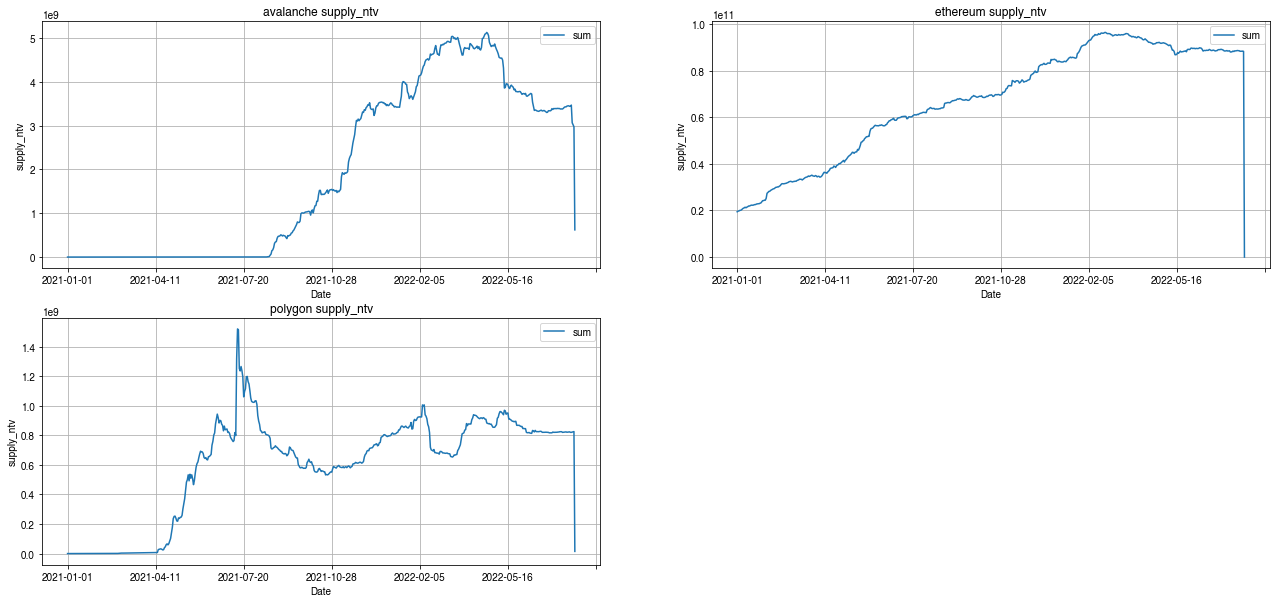

In [14]:
plot_agg('supply_ntv')

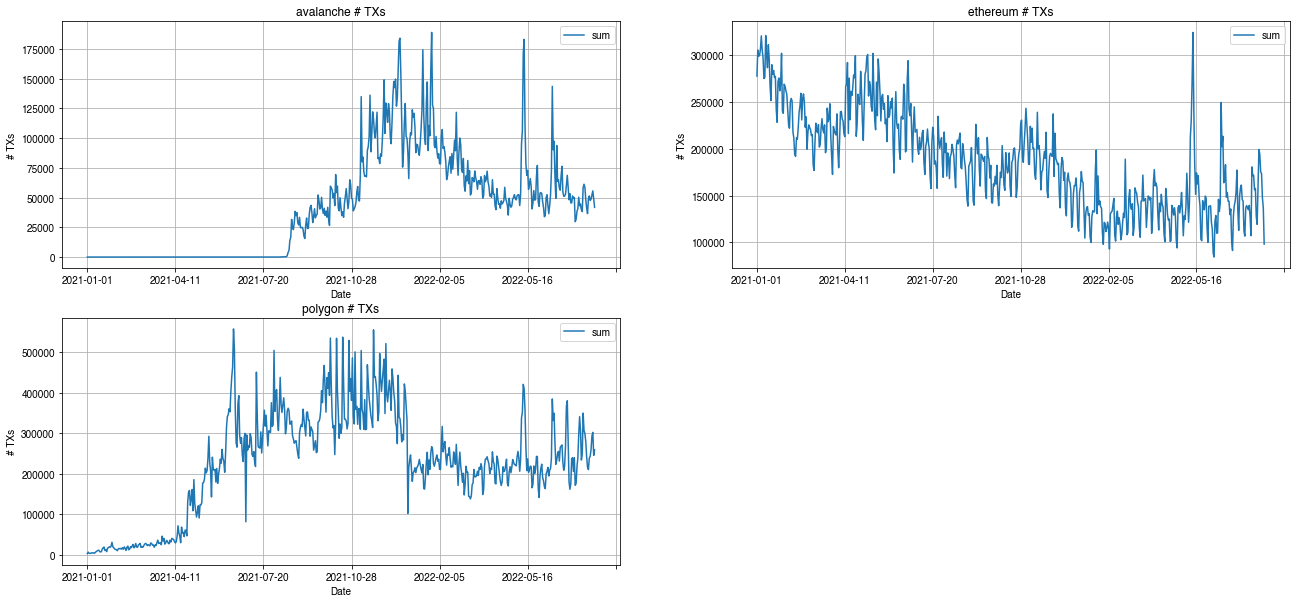

In [15]:
plot_agg('# TXs')

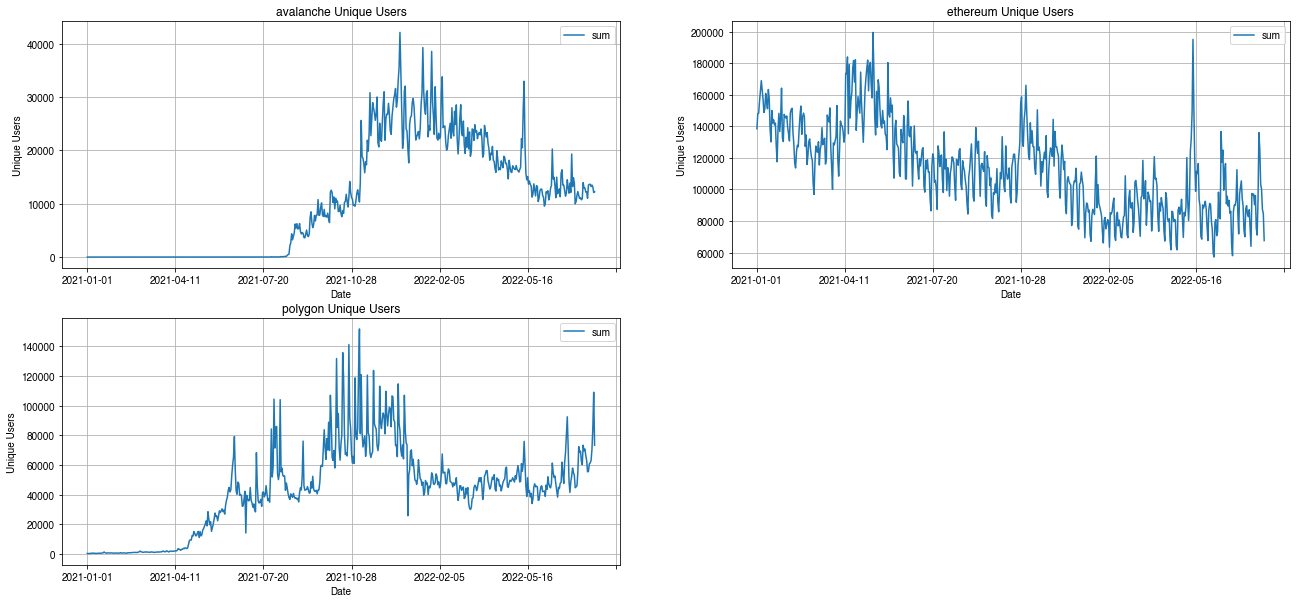

In [16]:
plot_agg('Unique Users')

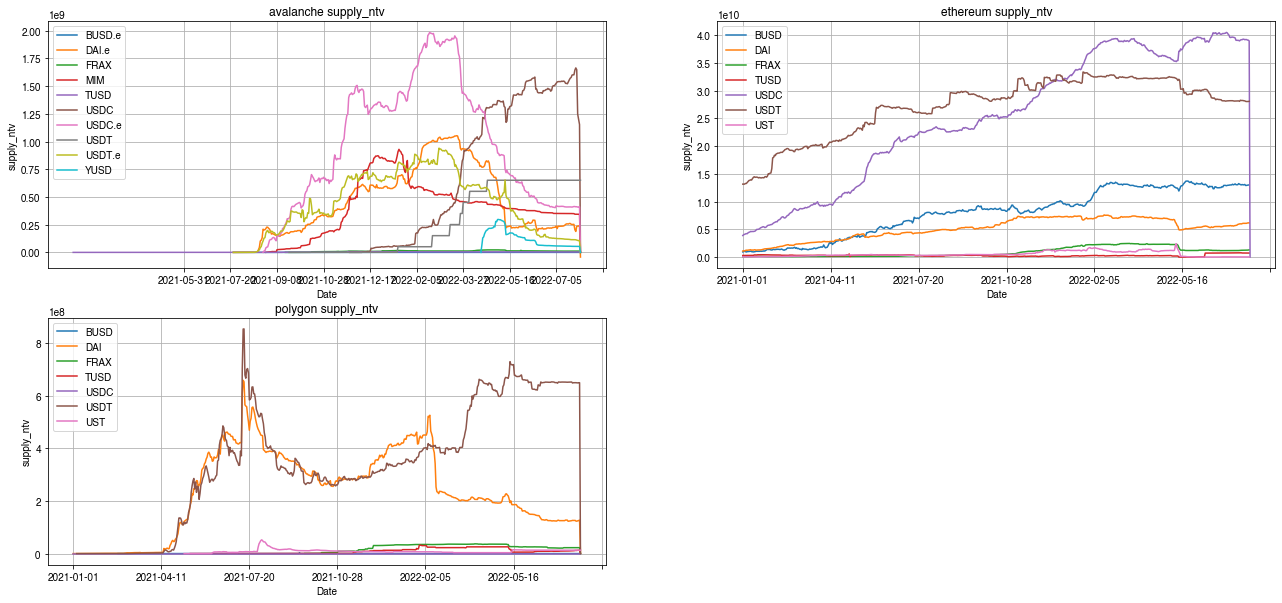

In [17]:
plot_by_token('supply_ntv')

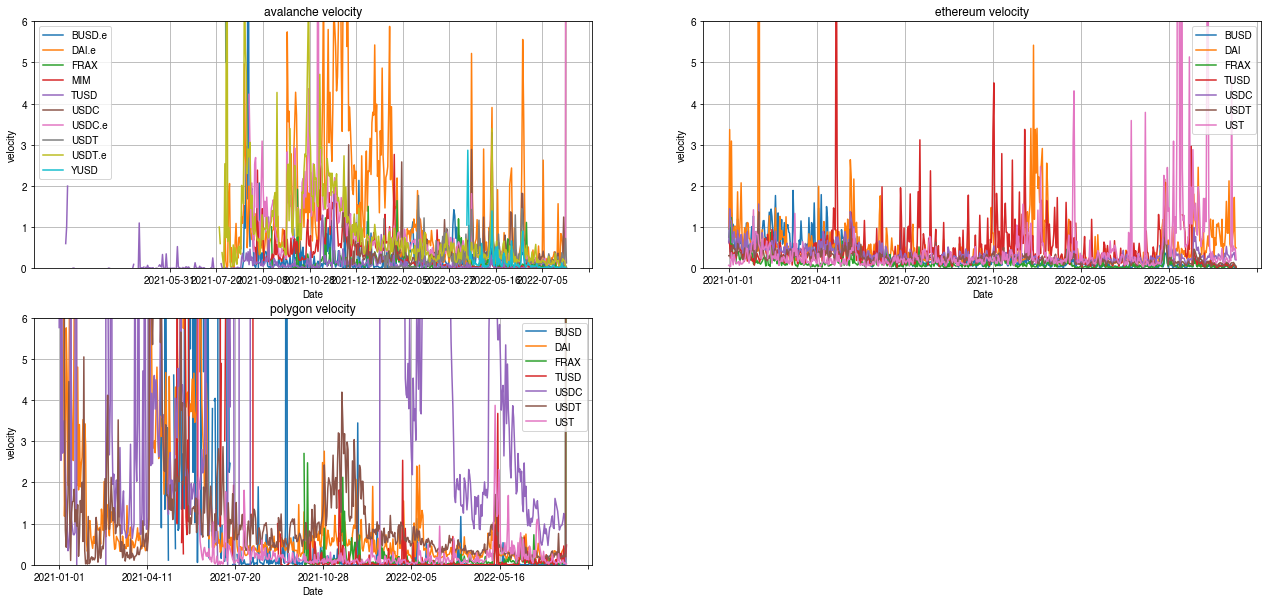

In [18]:
plot_by_token('velocity',[0,6]) #NEED TO ADD A ROLLING MEAN HERE

<AxesSubplot:xlabel='date'>

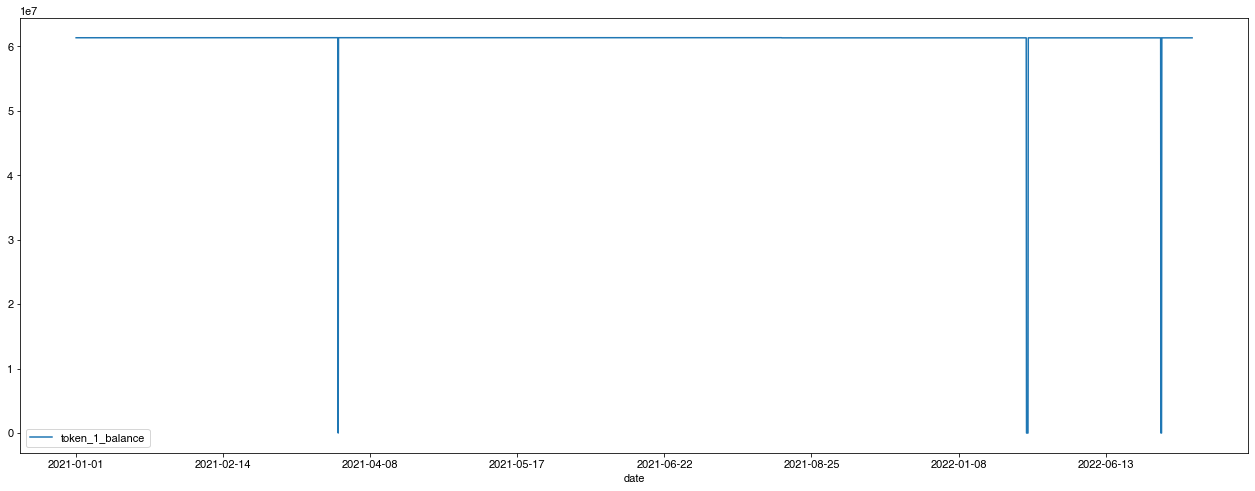

In [209]:
df = token_1
temp_df = df[(df['chain']=='Ethereum') & (df['protocol']=='Uniswap') & (df['pool_name']=='USDC/WETH')]
temp_df.plot(x='date',y='token_1_balance',figsize=(22,8))

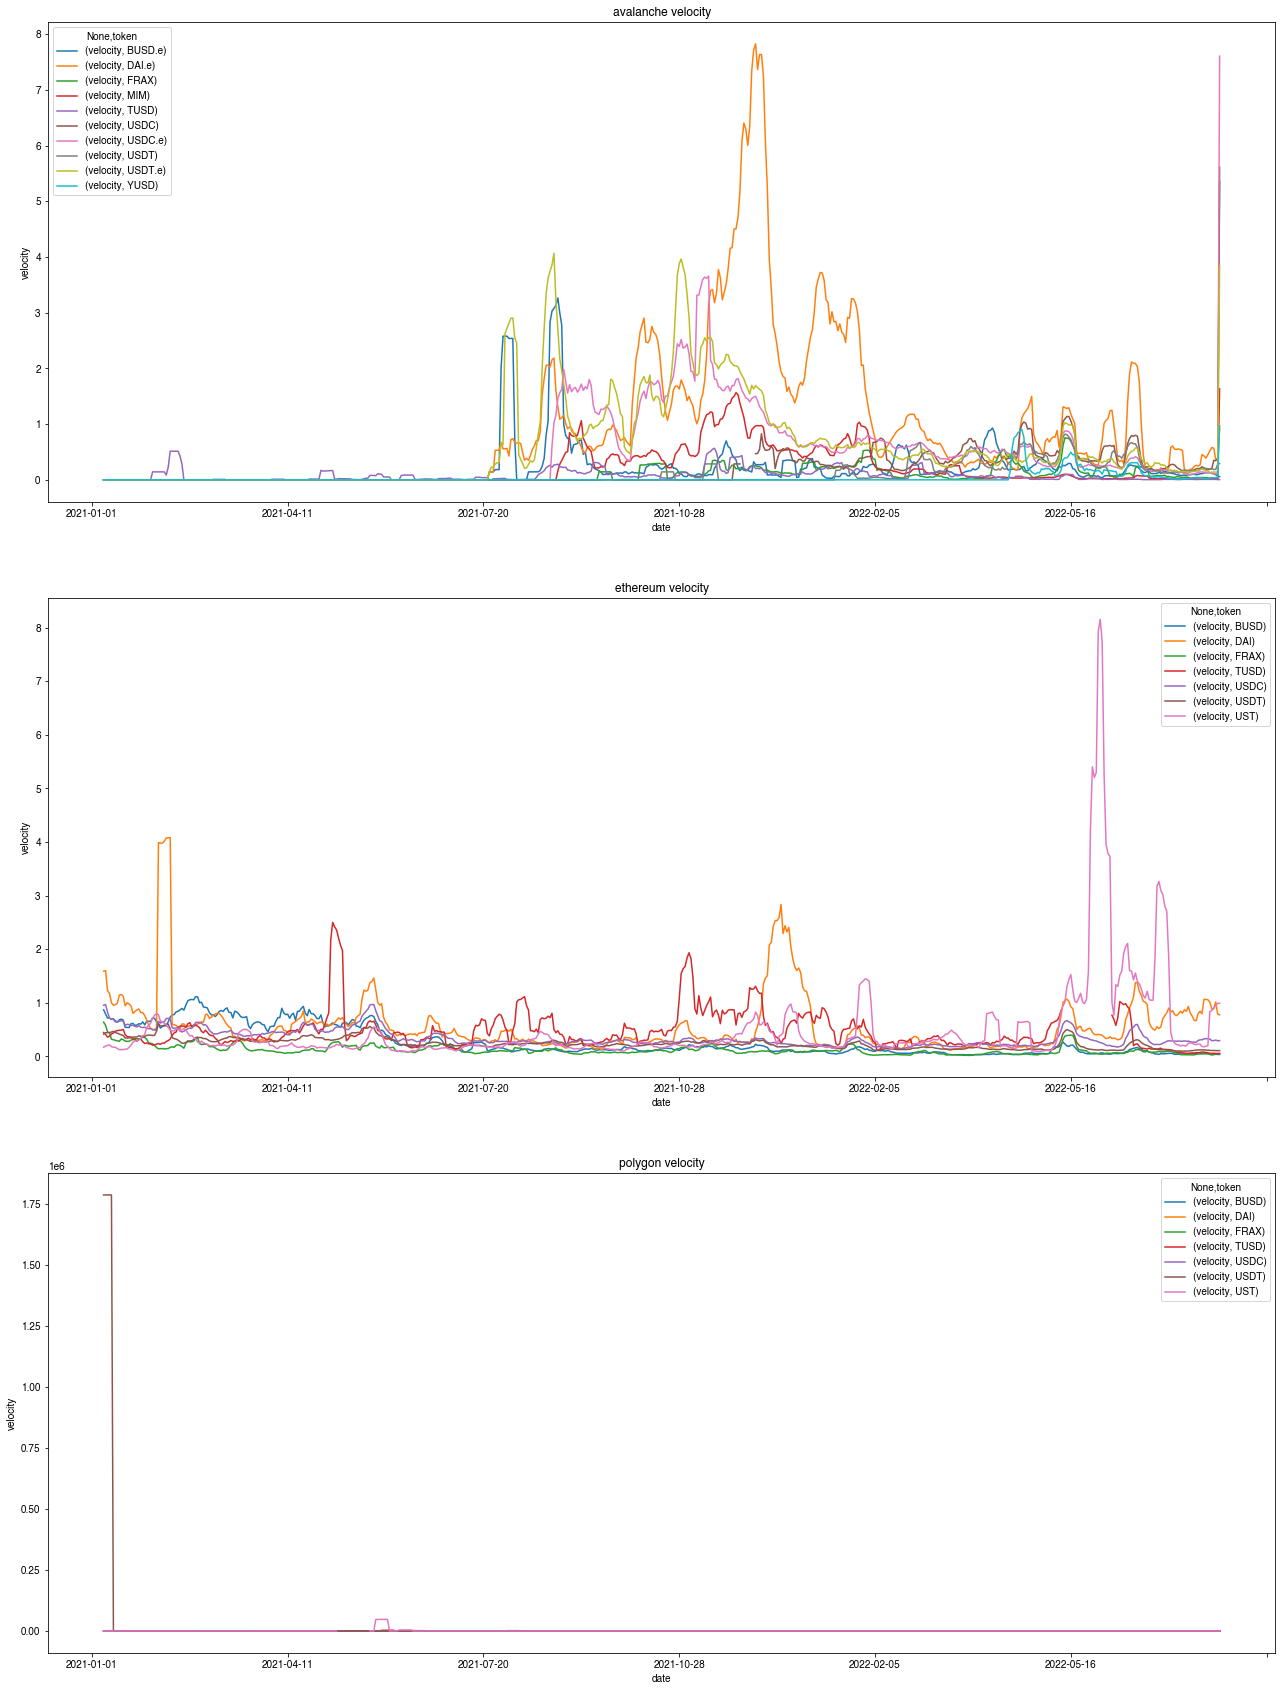

In [89]:
#Velocity
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(22,30))
subplots_vel = [ax1,ax2,ax3]
chains = ['avalanche','ethereum','polygon']
#fig = plt.figure(figsize=(22,8))
for k in range(3):
    curr_chain = chains[k]
    velocity_df = stable_df[stable_df['chain']==curr_chain] 
    velocity_df = velocity_df.groupby(['date','token'])['velocity'].sum().to_frame().unstack(level=1).abs() 
    velocity_df.rolling(7).mean().plot(ax = subplots_vel[k],title=curr_chain+' velocity',ylabel='velocity')

In [188]:
lend_df['borrows/deposits']=lend_df['totalBorrowBalanceUSD']/lend_df['totalDepositBalanceUSD']

<AxesSubplot:xlabel='date'>

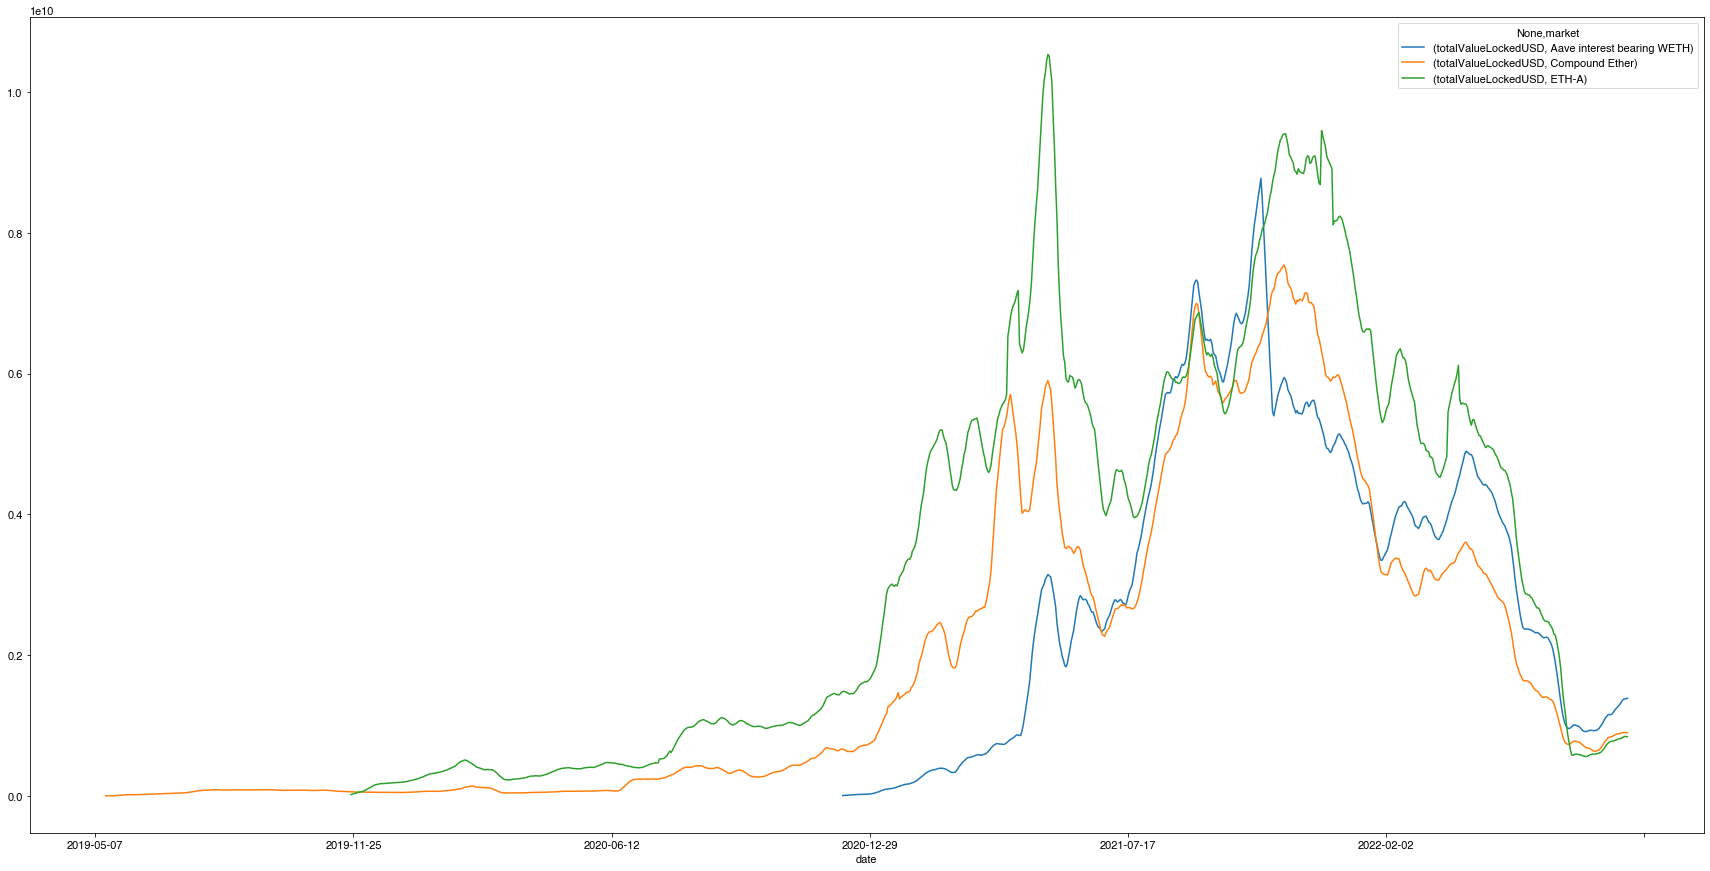

In [200]:
metric = 'totalValueLockedUSD'
curr_df = lend_df[(lend_df['chain']=='Ethereum') &
                 (lend_df[metric]>6e9)]
curr_df = curr_df.groupby(['date','market'])[metric].sum().to_frame().unstack(level=1).abs()
col_vals = curr_df.columns.values
top_markets = ['']*len(col_vals)
for k in range(len(col_vals)):
    top_markets[k] = col_vals[k][1]
curr_df = lend_df[lend_df['market'].isin(top_markets)]
curr_df = curr_df.groupby(['date','market'])[metric].sum().to_frame().unstack(level=1).abs()
curr_df.rolling(9).mean().plot(figsize=(30,15))

In [182]:
def plot_agg_lending(metric):
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(22,30))
    fig 
    subplots = [ax1,ax2,ax3]
    chains = ['Avalanche','Ethereum','Polygon']
    for k in range(3):
        curr_chain=chains[k]
        curr_df = lend_df[(lend_df['chain']==curr_chain)]
        curr_df = curr_df.groupby(['date'])[metric].sum().to_frame().unstack(level=1).abs()
        curr_df.rolling(5).mean().plot(figsize=(30,30),ax=subplots[k],title = curr_chain+' '+metric)
        subplots[k].grid()

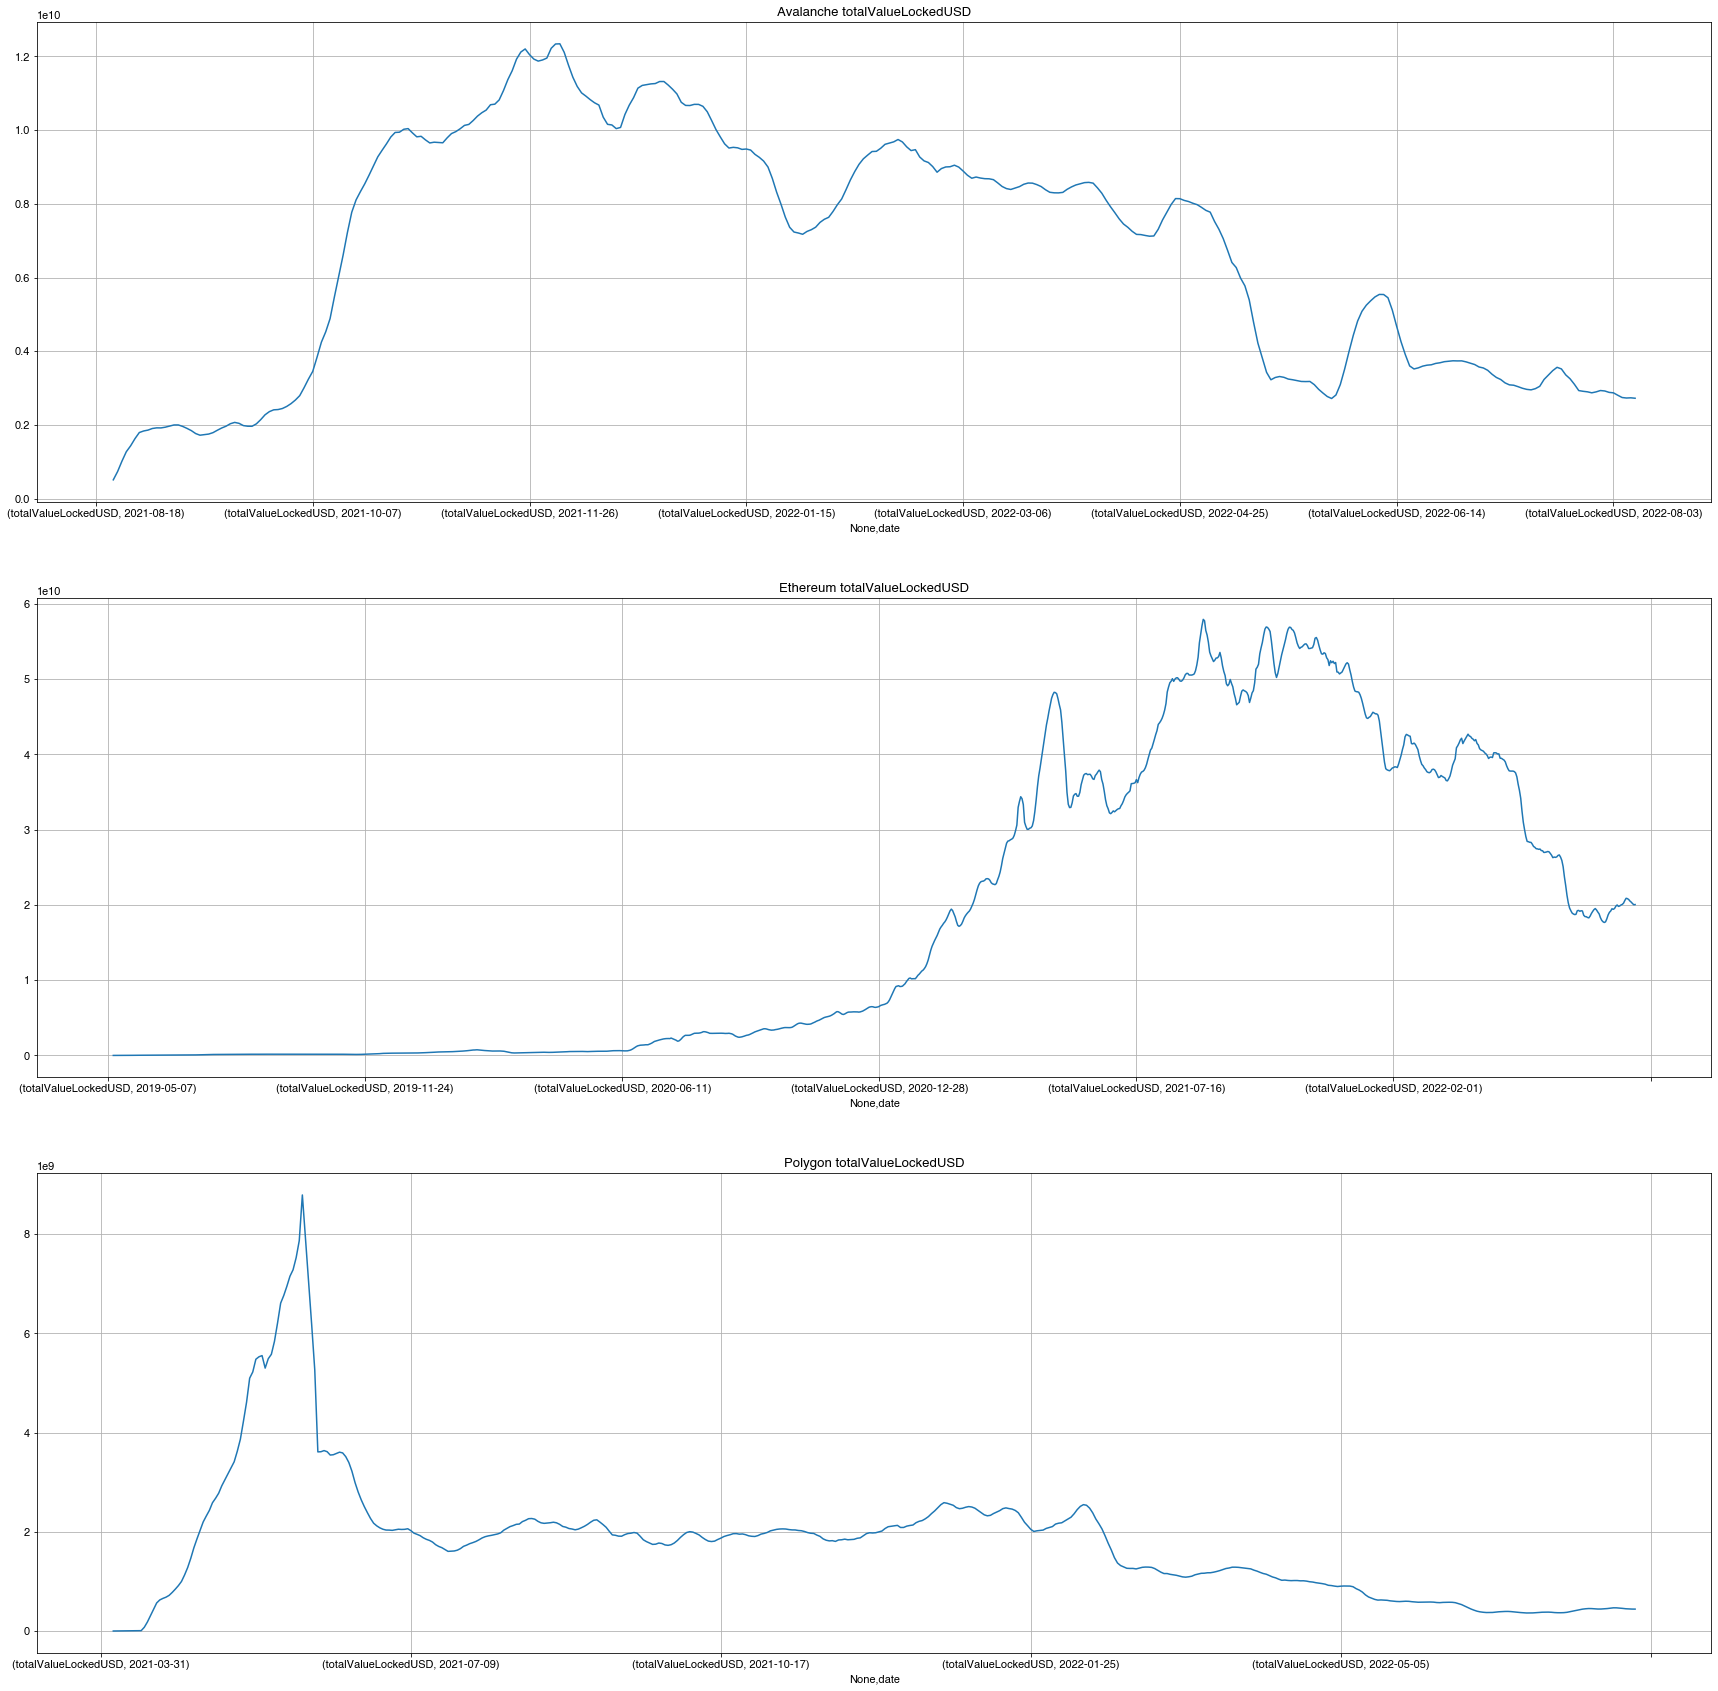

In [183]:
plot_agg_lending('totalValueLockedUSD')

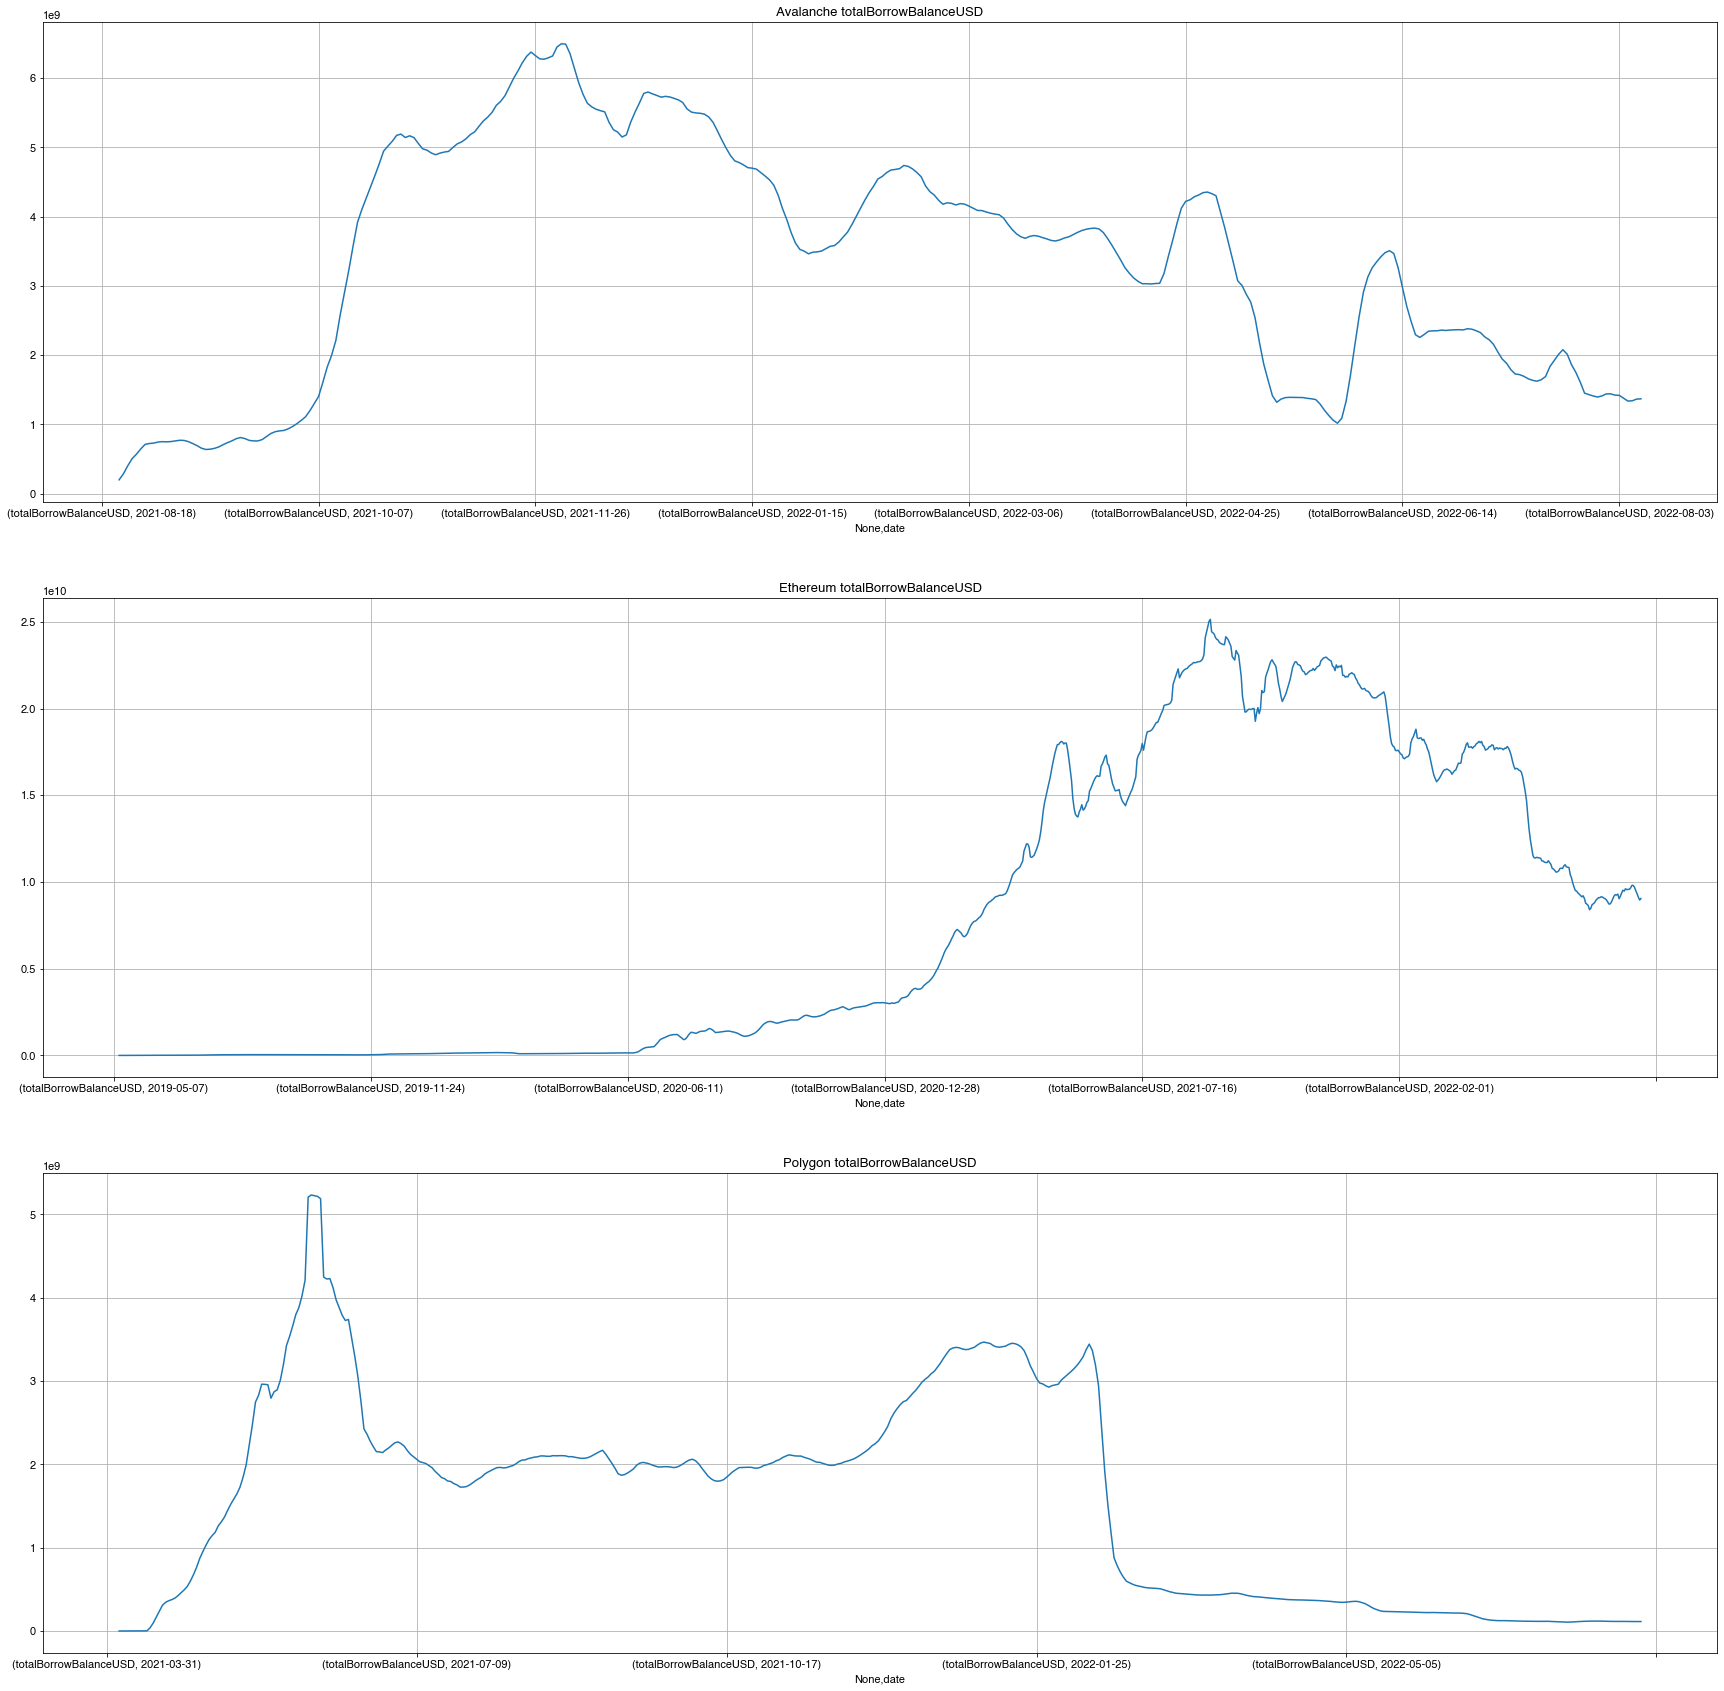

In [184]:
plot_agg_lending('totalBorrowBalanceUSD')

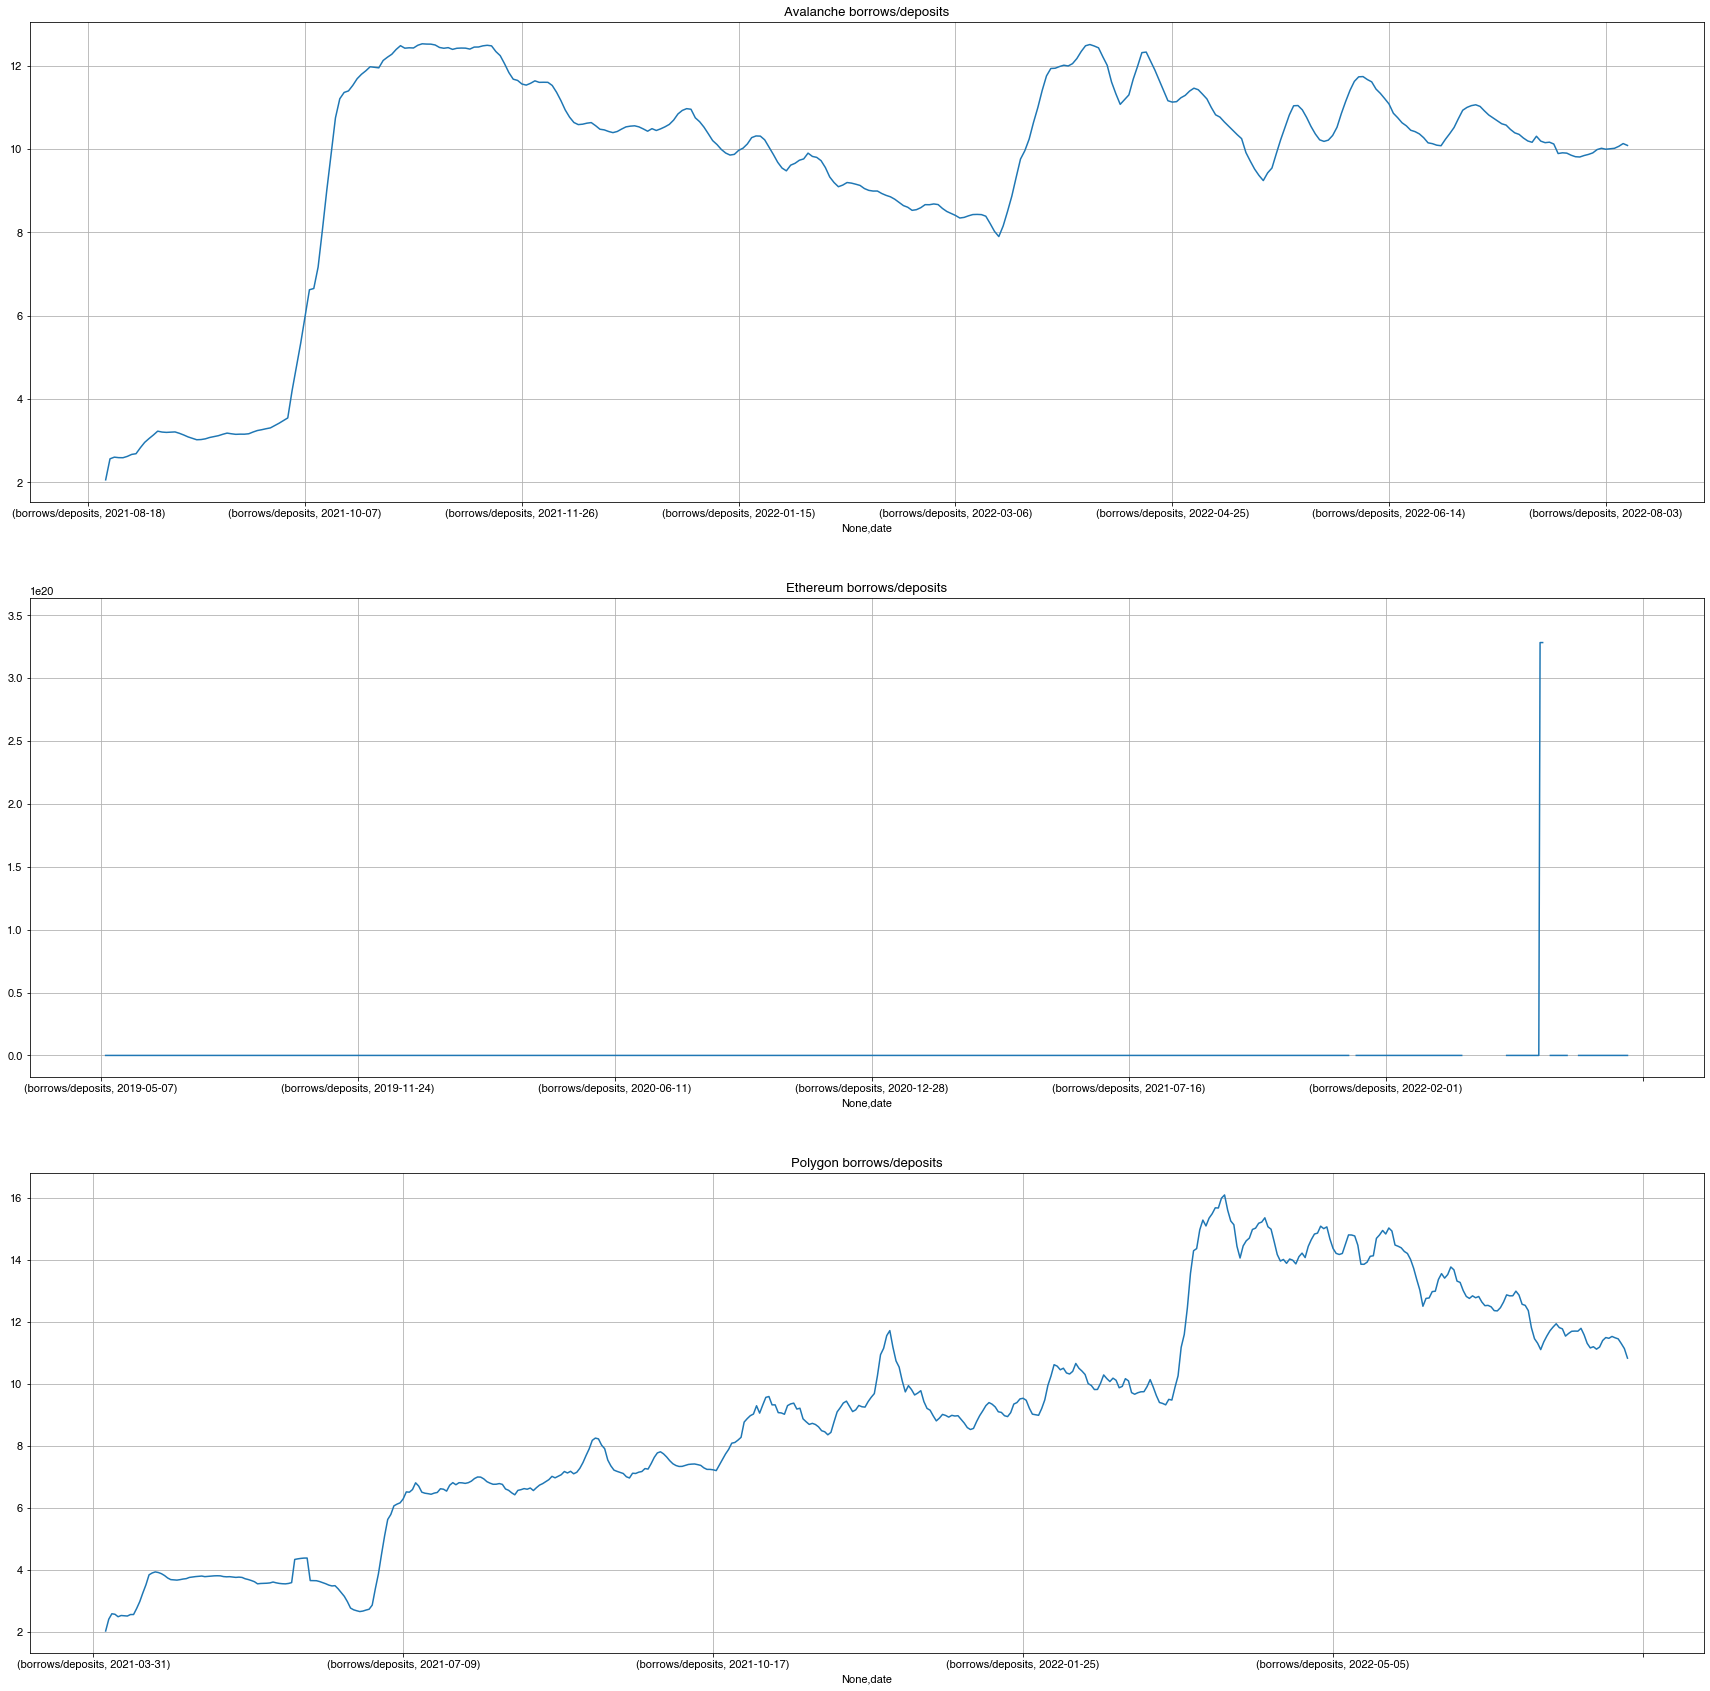

In [189]:
plot_agg_lending('borrows/deposits')

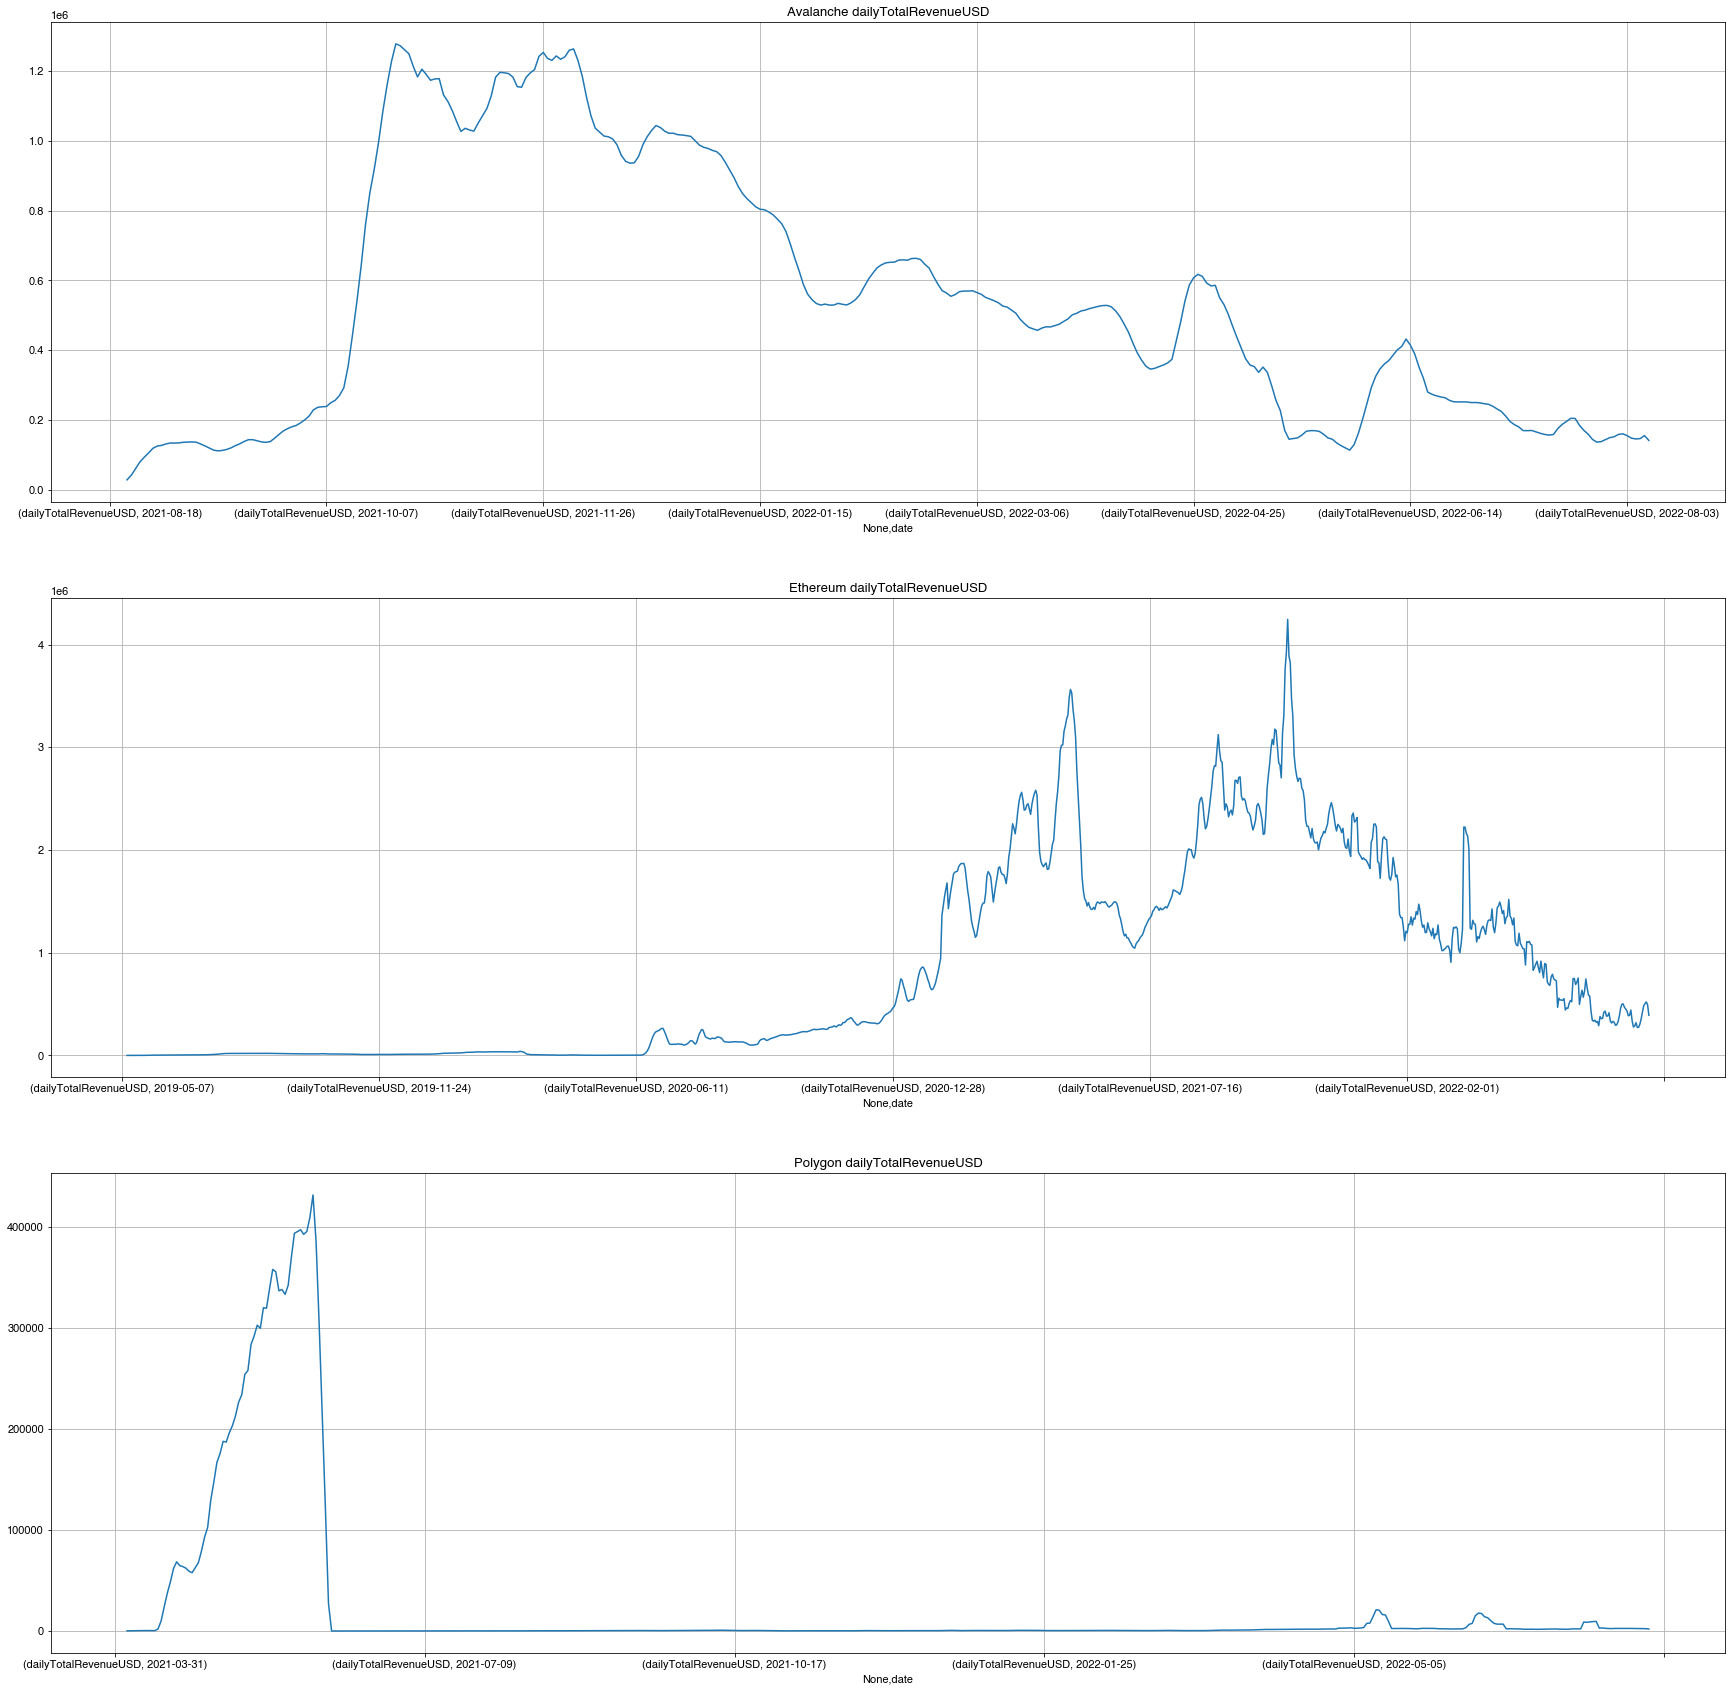

In [185]:
plot_agg_lending('dailyTotalRevenueUSD')